In [8]:
import os
import numpy as np
import cv2 as cv
from sklearn.cluster import DBSCAN
from PIL import Image
from scipy import ndimage
import copy
import matplotlib.pyplot as plt

In [20]:
# Load the original image
image_path = r"C:\Users\zc\OneDrive\Downloads\before coat 10kv (stitched).tif"
full_image = cv.imread(image_path)

# Downsize the image for faster processing
processing_scale = 0.08  # Scale down based on scale
processing_image = cv.resize(
    full_image, 
    None, 
    fx=processing_scale, 
    fy=processing_scale, 
    interpolation=cv.INTER_AREA
)
orig_img = np.copy(processing_image)

# Convert to grayscale and preprocess
gray = cv.cvtColor(processing_image, cv.COLOR_BGR2GRAY)
gray = (((gray - np.min(gray)) / np.max(gray)) * 255).astype(np.uint8)
blur_10 = cv.GaussianBlur(gray, (15, 15), 0)
thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

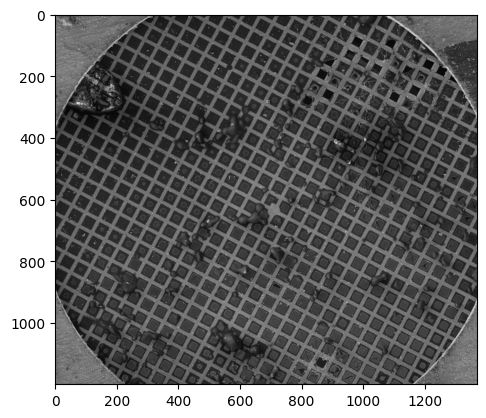

In [21]:
plt.imshow(gray, cmap='gray')
plt.show()

In [22]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(blur_10, None)

In [23]:
# Load the original image
image_path = r"C:\Users\zc\OneDrive\Downloads\before coat 2kv (stitched).tif"
full_image = cv.imread(image_path)

# Downsize the image for faster processing
processing_scale = 0.08  # Scale down based on scale
processing_image = cv.resize(
    full_image, 
    None, 
    fx=processing_scale, 
    fy=processing_scale, 
    interpolation=cv.INTER_AREA
)
orig_img = np.copy(processing_image)

# Convert to grayscale and preprocess
gray = cv.cvtColor(processing_image, cv.COLOR_BGR2GRAY)
gray = (((gray - np.min(gray)) / np.max(gray)) * 255).astype(np.uint8)
blur_2 = cv.GaussianBlur(gray, (15, 15), 0)

In [24]:
kp2, des2 = sift.detectAndCompute(blur_2, None)

In [25]:
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

In [26]:
matches = sorted(matches, key=lambda x: x.distance)

In [29]:
img_matches = cv.drawMatches(blur_10, kp1, blur_2, kp2, matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

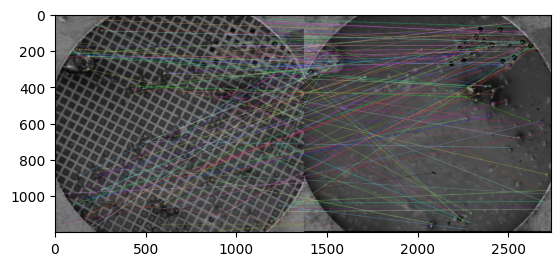

In [30]:
plt.imshow(img_matches)
plt.show()

In [33]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

In [64]:
M, mask = cv.findHomography(dst_pts, src_pts, cv.RANSAC, 30.0)

In [65]:
h, w = blur_10.shape
blur_2_aligned = cv.warpPerspective(blur_2, M, (w, h))

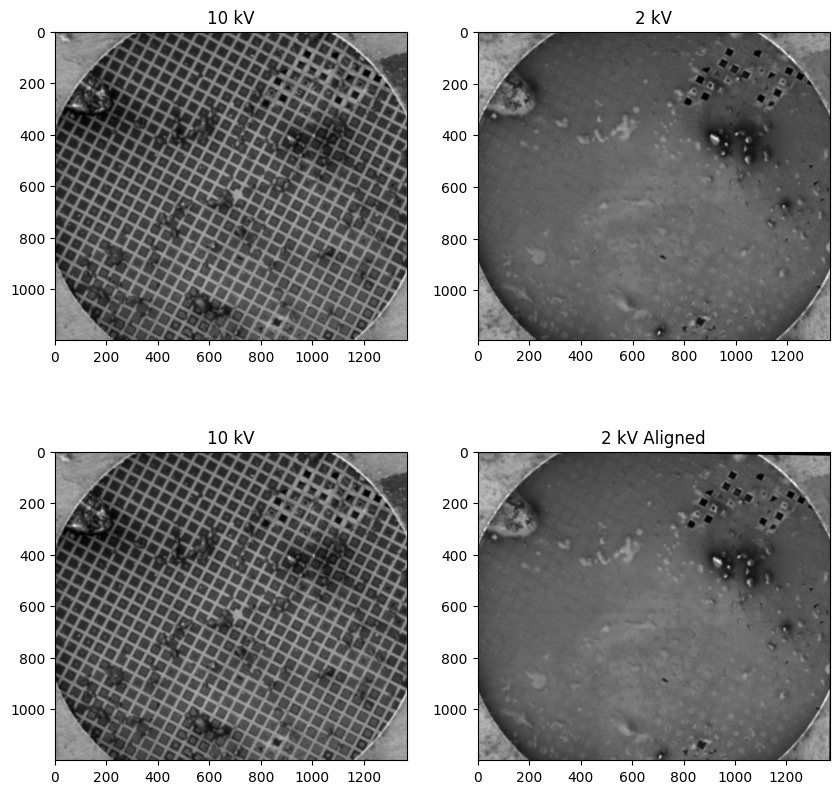

In [66]:
# Create a 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display images in each pane
axs[0, 0].imshow(blur_10, cmap='gray')
axs[0, 0].set_title("10 kV")

axs[0, 1].imshow(blur_2, cmap='gray')
axs[0, 1].set_title("2 kV")

axs[1, 0].imshow(blur_10, cmap='gray')
axs[1, 0].set_title("10 kV")

axs[1, 1].imshow(blur_2_aligned, cmap='gray')
axs[1, 1].set_title("2 kV Aligned")

plt.show()